In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [59]:
import warnings

warnings.filterwarnings('ignore')

In [61]:
data = "C:/Users/DOMNIC KORIR/Desktop/test jupyter/Churn_Modelling (2).csv"

df = pd.read_csv(data, header=None)

In [62]:
# view dimensions of dataset

df.shape

(10001, 14)

In [65]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1
2,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1
4,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0


In [66]:
col_names = ['RowNumber','CustomerId','Surname','CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


df.columns = col_names

col_names

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [67]:
# let's again preview the dataset

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1
2,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1
4,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RowNumber        10001 non-null  object
 1   CustomerId       10001 non-null  object
 2   Surname          10001 non-null  object
 3   CreditScore      10001 non-null  object
 4   Geography        10001 non-null  object
 5   Gender           10001 non-null  object
 6   Age              10001 non-null  object
 7   Tenure           10001 non-null  object
 8   Balance          10001 non-null  object
 9   NumOfProducts    10001 non-null  object
 10  HasCrCard        10001 non-null  object
 11  IsActiveMember   10001 non-null  object
 12  EstimatedSalary  10001 non-null  object
 13  Exited           10001 non-null  object
dtypes: object(14)
memory usage: 1.1+ MB


In [69]:
col_names = ['RowNumber','CustomerId','Surname','CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


for col in col_names:
    
    print(df[col].value_counts())   

RowNumber    1
6671         1
6664         1
6665         1
6666         1
            ..
3334         1
3335         1
3336         1
3337         1
10000        1
Name: RowNumber, Length: 10001, dtype: int64
CustomerId    1
15667932      1
15766185      1
15667632      1
15599024      1
             ..
15599078      1
15702300      1
15660735      1
15671390      1
15628319      1
Name: CustomerId, Length: 10001, dtype: int64
Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
            ..
Bold         1
Bonham       1
Poninski     1
Hassall      1
Burbidge     1
Name: Surname, Length: 2933, dtype: int64
850    233
678     63
655     54
705     53
667     53
      ... 
359      1
399      1
363      1
417      1
419      1
Name: CreditScore, Length: 461, dtype: int64
France       5014
Germany      2509
Spain        2477
Geography       1
Name: Geography, dtype: int64
Male      5457
Female    4543
Gender       1
Name: Gender, dtype: int64
37     478
38     477

In [70]:
df['Exited'].value_counts()

0         7963
1         2037
Exited       1
Name: Exited, dtype: int64

In [71]:
# check missing values in variables

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [72]:
X = df.drop(['Exited'], axis=1)

y = df['Exited']

In [73]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [74]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((6700, 13), (3301, 13))

In [75]:
# check data types in X_train

X_train.dtypes

RowNumber          object
CustomerId         object
Surname            object
CreditScore        object
Geography          object
Gender             object
Age                object
Tenure             object
Balance            object
NumOfProducts      object
HasCrCard          object
IsActiveMember     object
EstimatedSalary    object
dtype: object

In [76]:
X_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5027,5027,15673223,Hou,626,France,Male,44,10,0,2,0,0,164287.86
9235,9235,15766044,Cameron,642,Germany,Male,49,4,120688.61,1,1,0,24770.22
3944,3944,15671915,Bowen,649,France,Male,46,5,0,2,1,1,76946.6
6862,6862,15665524,Savage,605,Spain,Male,41,5,103154.66,1,0,0,143203.78
5350,5350,15567246,Selwyn,684,Germany,Male,32,3,102630.13,2,1,1,127433.47


In [78]:
# import category encoders

import category_encoders as ce

In [81]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender','Age','Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [82]:
X_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5027,1,1,1,1,1,1,1,1,1,1,1,1,1
9235,2,2,2,2,2,1,2,2,2,2,2,1,2
3944,3,3,3,3,1,1,3,3,1,1,2,2,3
6862,4,4,4,4,3,1,4,3,3,2,1,1,4
5350,5,5,5,5,2,1,5,4,4,1,2,2,5


In [83]:
X_test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,-1.0,-1.0,297.0,65.0,1.0,2.0,12.0,7.0,-1.0,2.0,2.0,1.0,-1.0
4684,-1.0,-1.0,560.0,203.0,1.0,1.0,25.0,9.0,-1.0,2.0,2.0,1.0,-1.0
1731,-1.0,-1.0,145.0,39.0,1.0,1.0,29.0,11.0,1.0,1.0,2.0,1.0,-1.0
4742,-1.0,-1.0,1115.0,176.0,1.0,1.0,34.0,6.0,-1.0,1.0,2.0,1.0,-1.0
4521,-1.0,-1.0,1880.0,82.0,2.0,1.0,3.0,1.0,-1.0,4.0,2.0,1.0,-1.0


In [84]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8191


In [85]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8191


In [86]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [87]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

NumOfProducts      0.136441
Age                0.131866
Surname            0.108713
CreditScore        0.104258
EstimatedSalary    0.091988
CustomerId         0.091568
RowNumber          0.090982
Balance            0.086246
Tenure             0.062202
Geography          0.032556
IsActiveMember     0.030722
Gender             0.016321
HasCrCard          0.016137
dtype: float64

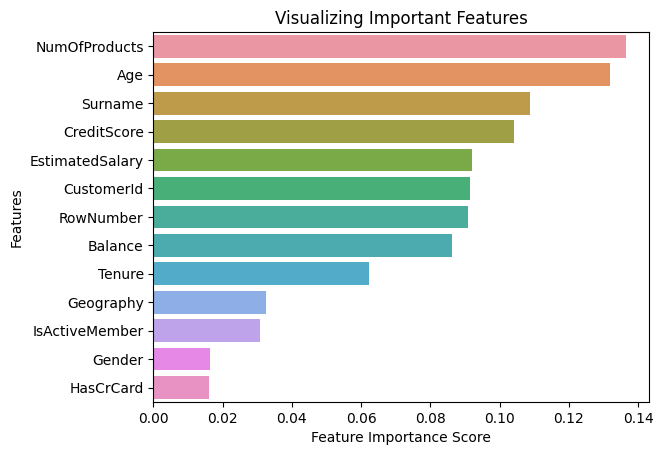

In [88]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [89]:
# declare feature vector and target variable

X = df.drop(['Exited', 'Age'], axis=1)

y = df['Exited']

In [90]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [91]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender','Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [92]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.7592


In [93]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[2171  447    0]
 [ 347  335    0]
 [   1    0    0]]


In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2618
           1       0.43      0.49      0.46       682
      Exited       0.00      0.00      0.00         1

    accuracy                           0.76      3301
   macro avg       0.43      0.44      0.43      3301
weighted avg       0.77      0.76      0.76      3301

